In [1]:
import transformer_lens
import torch
import numpy as np
from sklearn.decomposition import DictionaryLearning
# Load a model (eg GPT-2 Small)
model = transformer_lens.HookedTransformer.from_pretrained("gpt2-medium")


/mnt/d/gen/py/mechinterp/.venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer


In [2]:
# Run the model and get logits and activations
text1 = """
Artificial intelligence has made significant strides in recent years, revolutionizing various industries. Machine learning algorithms can now process vast amounts of data, identifying patterns and making predictions with remarkable accuracy. From autonomous vehicles to personalized recommendations, AI is becoming increasingly integrated into our daily lives. However, as these technologies advance, important ethical considerations arise, particularly regarding privacy, bias, and the potential impact on employment. Researchers and policymakers are working to address these challenges while harnessing the benefits of AI for society.
"""

text2 = """
The Renaissance, a period of cultural rebirth in Europe, marked a significant shift from medieval thinking to modern ideas. Beginning in Italy during the 14th century, this movement sparked innovations in art, literature, and science. Artists like Leonardo da Vinci and Michelangelo created masterpieces that continue to inspire today. The invention of the printing press by Johannes Gutenberg revolutionized the spread of knowledge, making books more accessible to the masses. This era also saw advancements in astronomy, with Copernicus proposing a heliocentric model of the solar system, challenging long-held beliefs about the universe.
"""

logits1, activations1 = model.run_with_cache(text1)
logits2, activations2 = model.run_with_cache(text2)


In [3]:
print(logits1.shape)
print(logits2.shape)
print(activations1)
print(activations2)

torch.Size([1, 100, 50257])
torch.Size([1, 121, 50257])
ActivationCache with keys ['hook_embed', 'hook_pos_embed', 'blocks.0.hook_resid_pre', 'blocks.0.ln1.hook_scale', 'blocks.0.ln1.hook_normalized', 'blocks.0.attn.hook_q', 'blocks.0.attn.hook_k', 'blocks.0.attn.hook_v', 'blocks.0.attn.hook_attn_scores', 'blocks.0.attn.hook_pattern', 'blocks.0.attn.hook_z', 'blocks.0.hook_attn_out', 'blocks.0.hook_resid_mid', 'blocks.0.ln2.hook_scale', 'blocks.0.ln2.hook_normalized', 'blocks.0.mlp.hook_pre', 'blocks.0.mlp.hook_post', 'blocks.0.hook_mlp_out', 'blocks.0.hook_resid_post', 'blocks.1.hook_resid_pre', 'blocks.1.ln1.hook_scale', 'blocks.1.ln1.hook_normalized', 'blocks.1.attn.hook_q', 'blocks.1.attn.hook_k', 'blocks.1.attn.hook_v', 'blocks.1.attn.hook_attn_scores', 'blocks.1.attn.hook_pattern', 'blocks.1.attn.hook_z', 'blocks.1.hook_attn_out', 'blocks.1.hook_resid_mid', 'blocks.1.ln2.hook_scale', 'blocks.1.ln2.hook_normalized', 'blocks.1.mlp.hook_pre', 'blocks.1.mlp.hook_post', 'blocks.1.hook

torch.Size([1, 16, 100, 100])


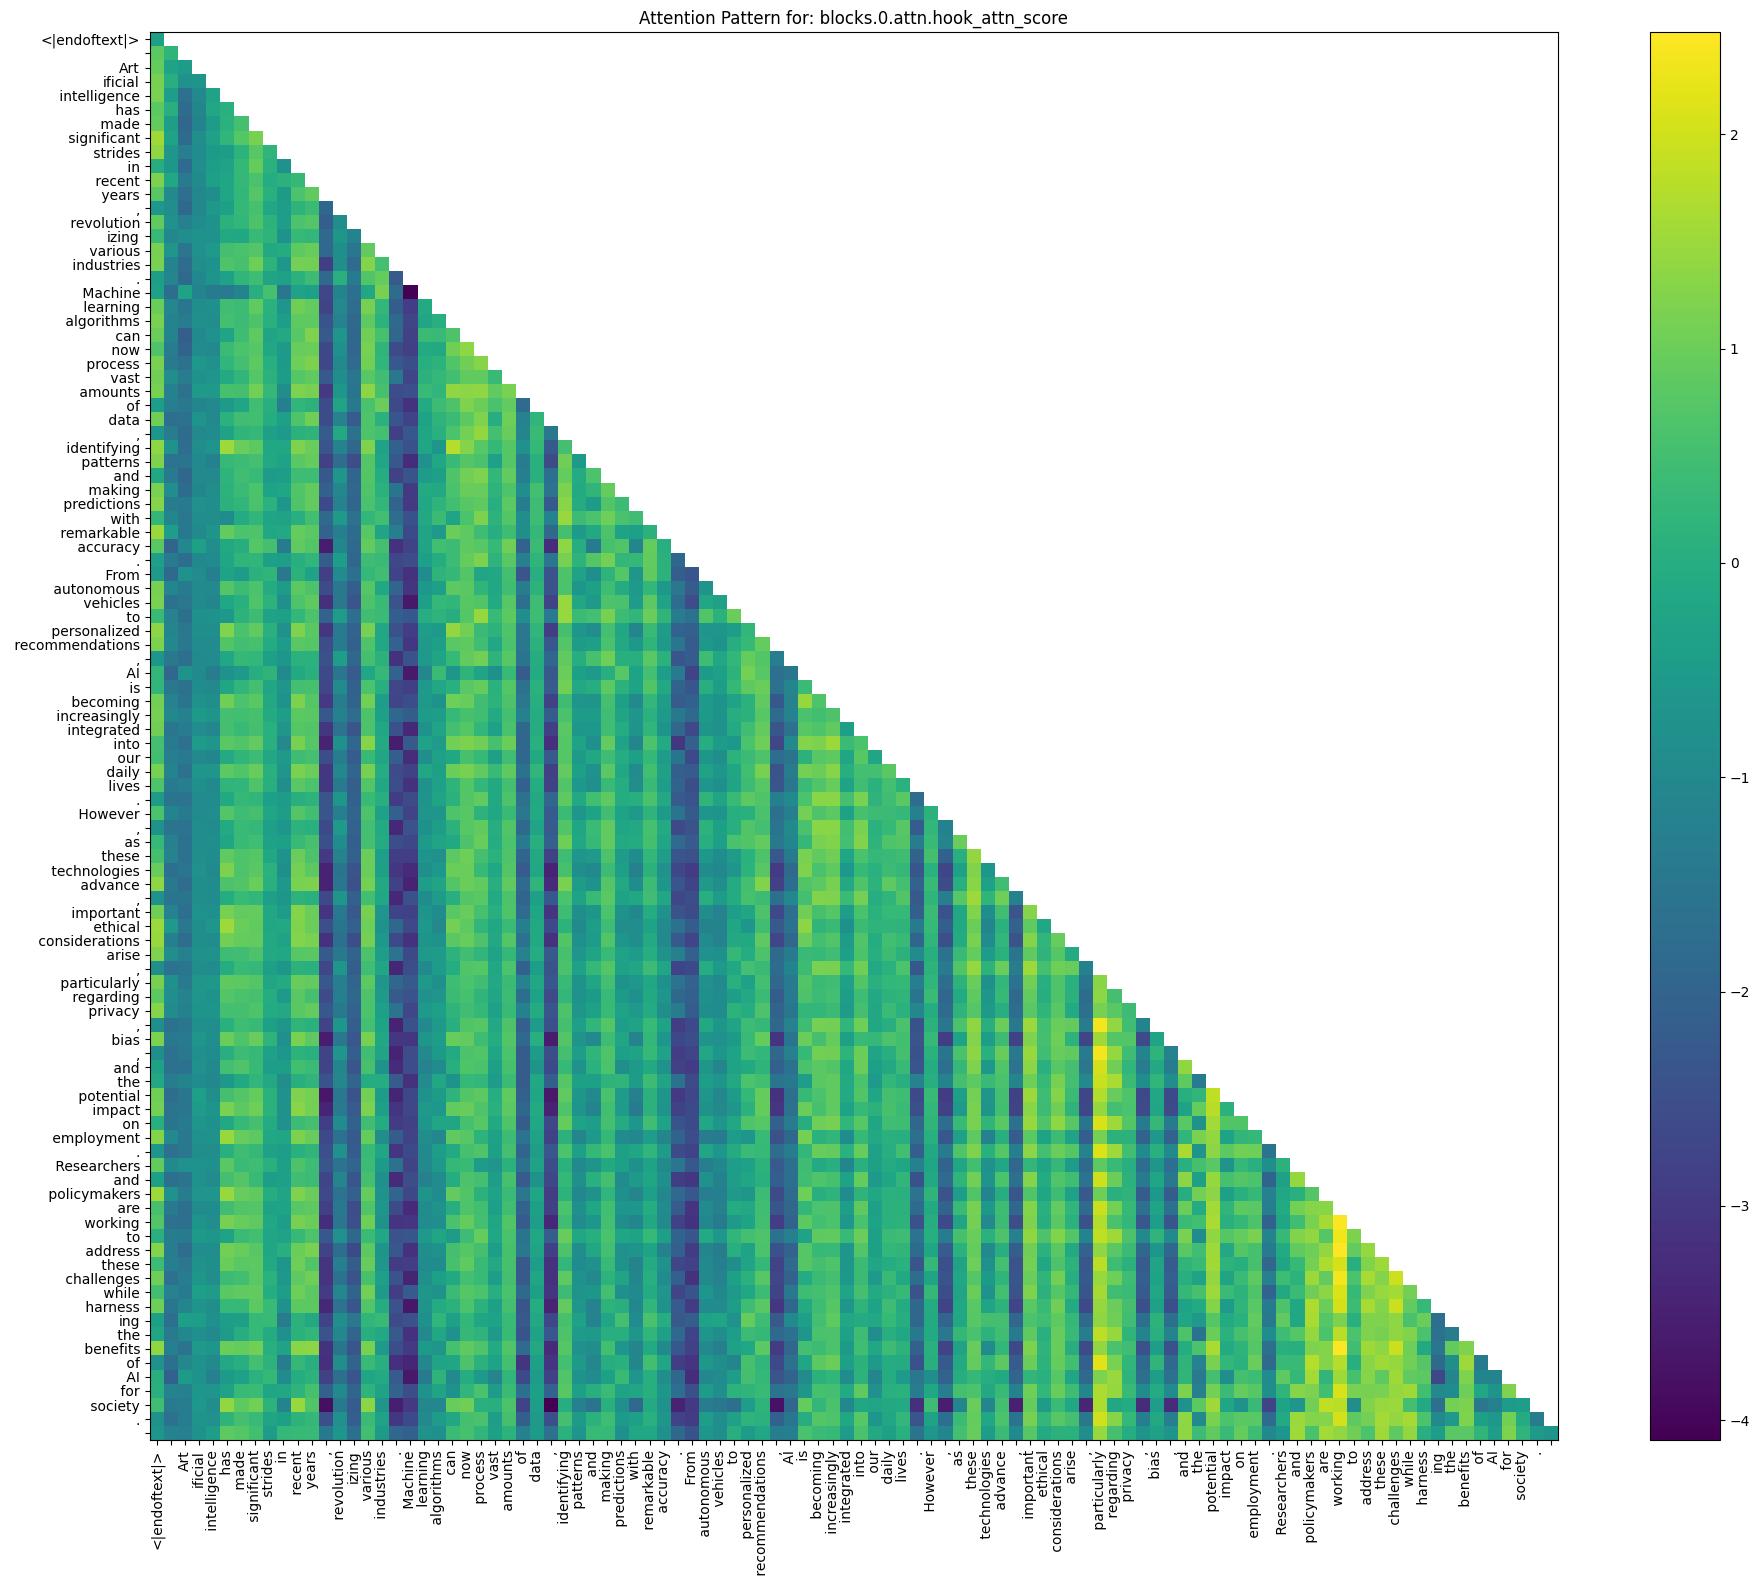

([<matplotlib.axis.YTick at 0x700614940880>,
 [Text(0, 0, '<|endoftext|>'),
  Text(0, 1, '\n'),
  Text(0, 2, 'The'),
  Text(0, 3, ' Renaissance'),
  Text(0, 4, ','),
  Text(0, 5, ' a'),
  Text(0, 6, ' period'),
  Text(0, 7, ' of'),
  Text(0, 8, ' cultural'),
  Text(0, 9, ' rebirth'),
  Text(0, 10, ' in'),
  Text(0, 11, ' Europe'),
  Text(0, 12, ','),
  Text(0, 13, ' marked'),
  Text(0, 14, ' a'),
  Text(0, 15, ' significant'),
  Text(0, 16, ' shift'),
  Text(0, 17, ' from'),
  Text(0, 18, ' medieval'),
  Text(0, 19, ' thinking'),
  Text(0, 20, ' to'),
  Text(0, 21, ' modern'),
  Text(0, 22, ' ideas'),
  Text(0, 23, '.'),
  Text(0, 24, ' Beginning'),
  Text(0, 25, ' in'),
  Text(0, 26, ' Italy'),
  Text(0, 27, ' during'),
  Text(0, 28, ' the'),
  Text(0, 29, ' 14'),
  Text(0, 30, 'th'),
  Text(0, 31, ' century'),
  Text(0, 32, ','),
  Text(0, 33, ' this'),
  Text(0, 34, ' movement'),
  Text(0, 35, ' sparked'),
  Text(0, 36, ' innovations'),
  Text(0, 37, ' in'),
  Text(0, 38, ' art'),
 

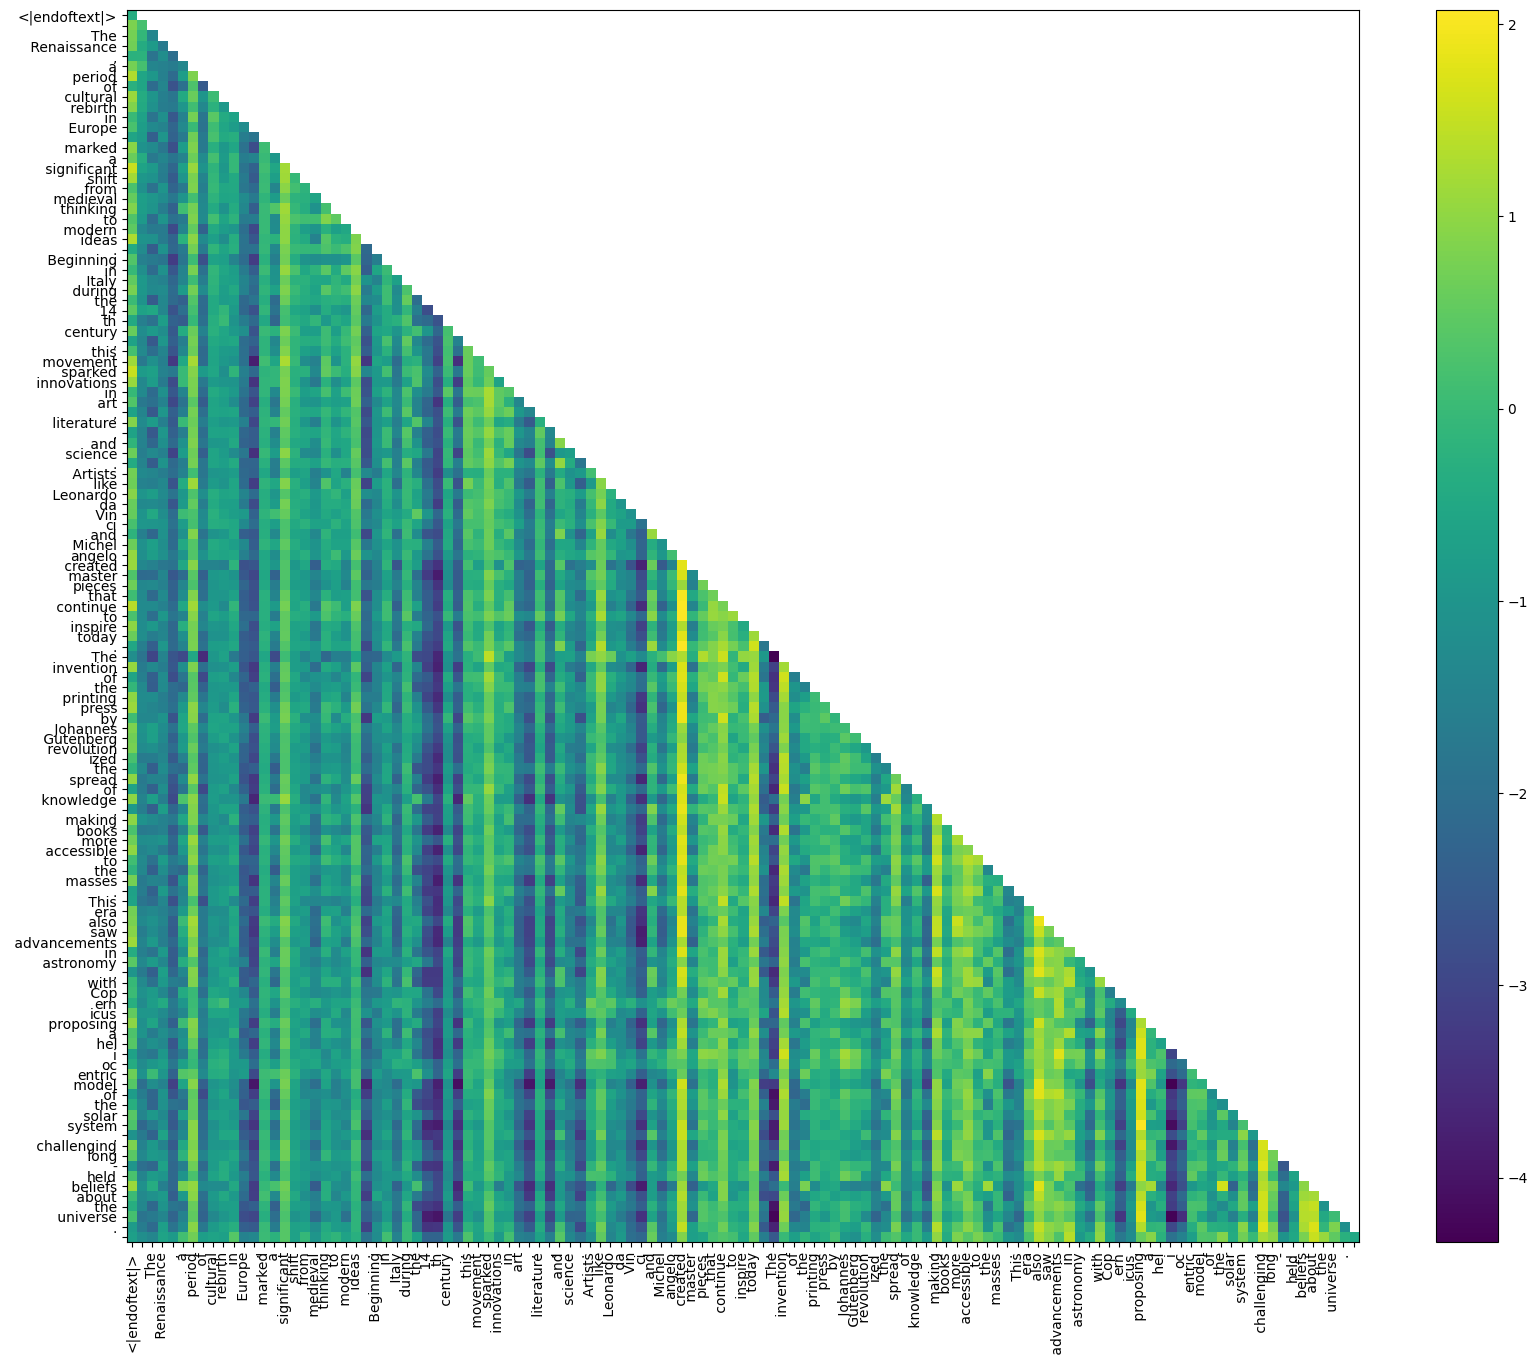

In [4]:
import matplotlib.pyplot as plt

# Get the attention patterns for the first layer
print(activations1['blocks.0.attn.hook_attn_scores'].shape)
attn_patterns1 = activations1['blocks.0.attn.hook_attn_scores'][0]  # [num_heads, seq_len, seq_len]
attn_patterns2 = activations2['blocks.0.attn.hook_attn_scores'][0]  # [num_heads, seq_len, seq_len]

# Select the first head
first_head_attn1 = attn_patterns1[0]  # [seq_len, seq_len]
first_head_attn2 = attn_patterns2[0]  # [seq_len, seq_len]
# Create a heatmap
plt.figure(figsize=(20, 16))
plt.imshow(first_head_attn1.detach().cpu().numpy(), cmap='viridis')
plt.colorbar()

# Set labels
tokens1 = model.to_str_tokens(text1)
tokens2 = model.to_str_tokens(text2)
plt.xticks(range(len(tokens1)), tokens1, rotation=90)
plt.yticks(range(len(tokens1)), tokens1)

plt.title("Attention Pattern for: blocks.0.attn.hook_attn_score")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 16))
plt.imshow(first_head_attn2.detach().cpu().numpy(), cmap='viridis')
plt.colorbar()

plt.xticks(range(len(tokens2)), tokens2, rotation=90)
plt.yticks(range(len(tokens2)), tokens2)


